<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/4_6_1_Data_Clustering_Session_Activity_6_Clustering_Evaluation_Silhouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Silhouette

## Load Data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

## Select Feature and Normalize data

In [ ]:
feature = ['University_GPAx_1st_year','Living_expenses/Household_income']#
copy_feature = ['University_GPAx_1st_year','Household_income','Living_expenses']
df2 = df[copy_feature].copy()
df2['Living_expenses/Household_income'] = df2['Living_expenses']/df2['Household_income']
df2 = df2.drop(columns=['Household_income','Living_expenses'])
df2 = df2.apply(pd.to_numeric)

normalized_df=(df2-df2.min())/(df2.max()-df2.min())
normalized_df=(df2-df2.mean(axis=0)) / df2.std(axis=0)
normalized_df['Living_expenses/Household_income']=normalized_df['Living_expenses/Household_income']*0.5

normalized_df

University_GPAx_1st_year  Living_expenses/Household_income
0                    0.888762                         -0.271790
1                   -0.439994                          0.851092
2                    0.828364                         -0.300055
3                    0.204252                         -0.282216
4                   -1.043974                          0.211480
..                        ...                               ...
938                  0.163986                         -0.248430
939                  1.633671                         -0.516951
940                 -0.721851                          0.726110
941                 -0.983576                          1.163546
942                  1.673936                          0.226183

[943 rows x 2 columns]

## ทำ K-Mean Clustering และแสดงผลการจัดกลุ่ม

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


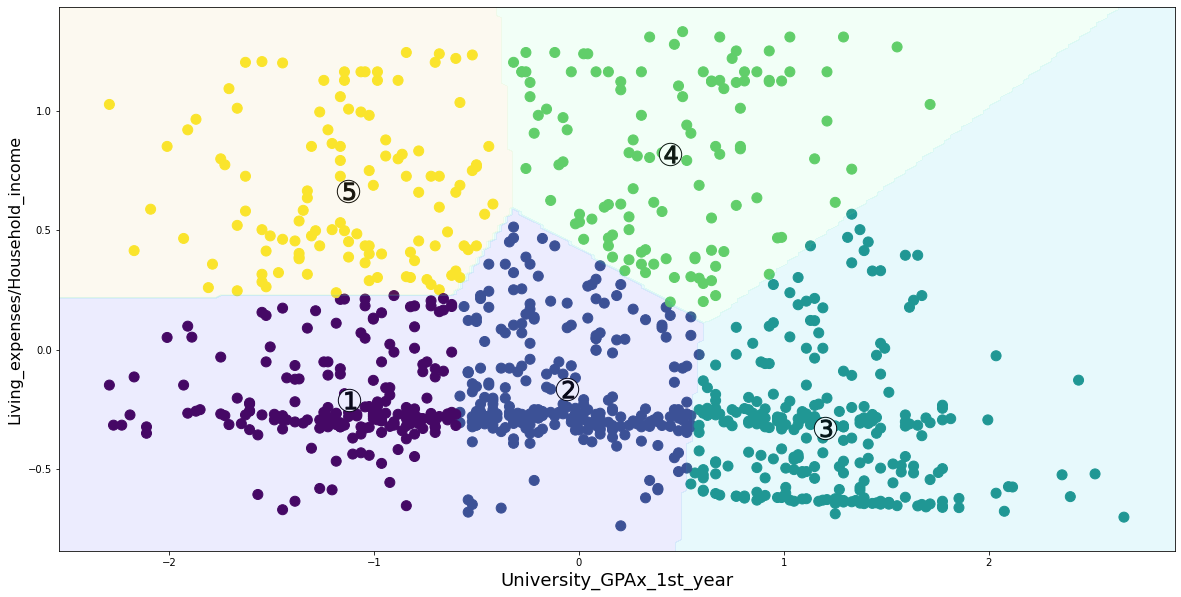

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt, colors
import numpy as np

n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))

plt.scatter(normalized_df[feature[0]], normalized_df[feature[1]], c=cluster_labels, alpha=50,s=100)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[0], fontsize=18)
plt.ylabel(feature[1], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()

## Silhouette Loop

For n_clusters = 2 The average silhouette_score is : 0.4878883612210668
For n_clusters = 3 The average silhouette_score is : 0.39521112436851846
For n_clusters = 4 The average silhouette_score is : 0.41823363145228015
For n_clusters = 5 The average silhouette_score is : 0.42136013246499227
For n_clusters = 6 The average silhouette_score is : 0.38304730738874765
For n_clusters = 7 The average silhouette_score is : 0.3847135072178811
For n_clusters = 8 The average silhouette_score is : 0.3621028648604467
For n_clusters = 9 The average silhouette_score is : 0.3566071408293086
For n_clusters = 10 The average silhouette_score is : 0.3658121776516466
For n_clusters = 11 The average silhouette_score is : 0.380889094028869
For n_clusters = 12 The average silhouette_score is : 0.3990919604682694
For n_clusters = 13 The average silhouette_score is : 0.3828644582764665
For n_clusters = 14 The average silhouette_score is : 0.39116524866912583
For n_clusters = 15 The average silhouette_score is : 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 22 The average silhouette_score is : 0.3841869702371419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 23 The average silhouette_score is : 0.38296756070315086


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 24 The average silhouette_score is : 0.38035565572288205


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 25 The average silhouette_score is : 0.385585816075198


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 26 The average silhouette_score is : 0.374648109250374


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 27 The average silhouette_score is : 0.3729538811257021


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 28 The average silhouette_score is : 0.3721440047619096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 29 The average silhouette_score is : 0.3820728086254026


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


For n_clusters = 30 The average silhouette_score is : 0.38097992960187615


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


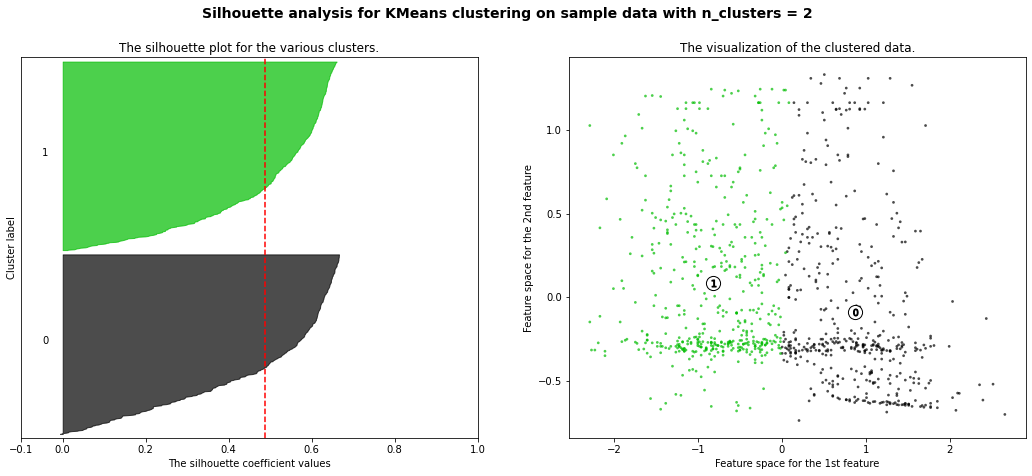

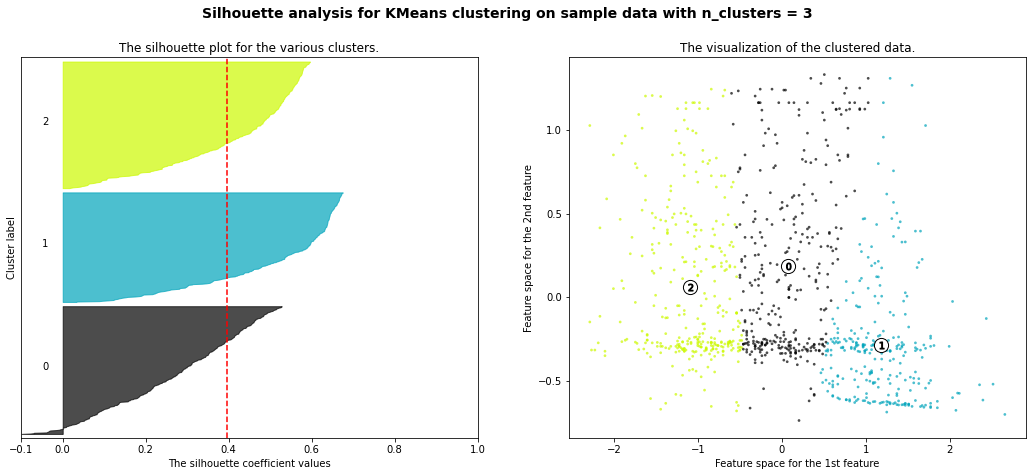

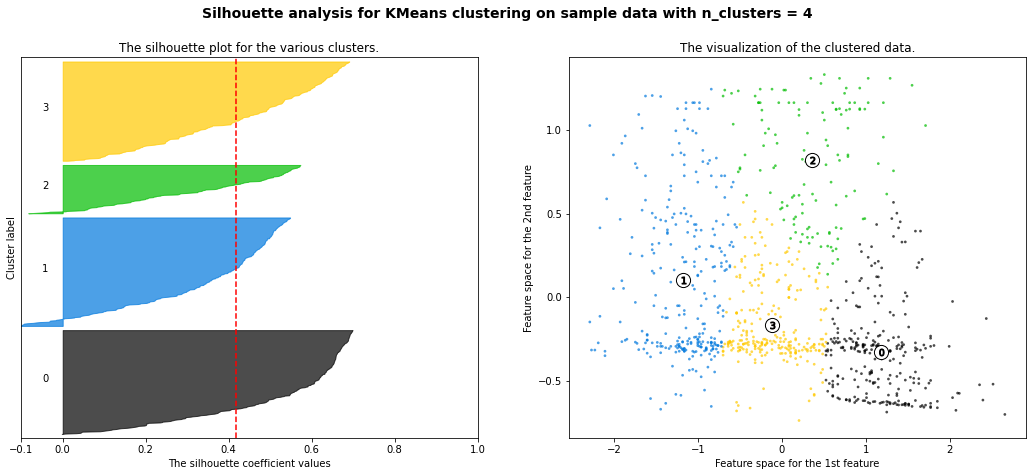

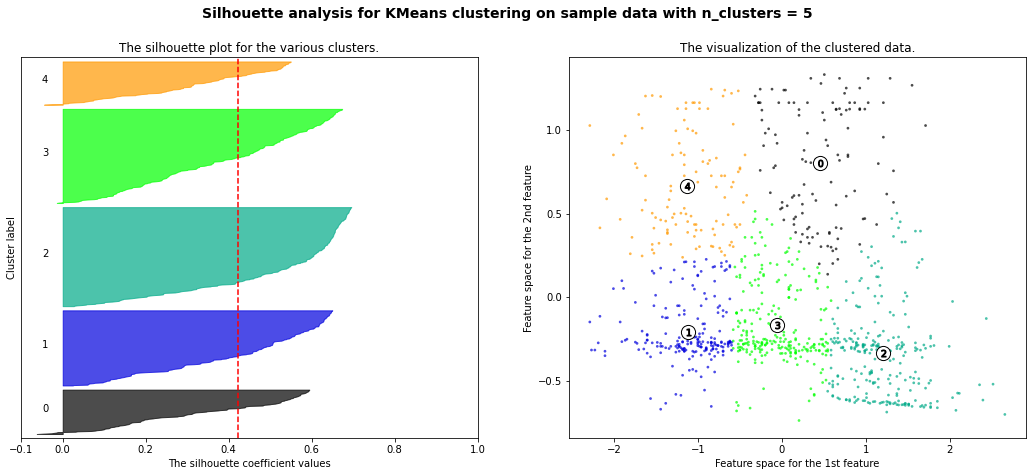

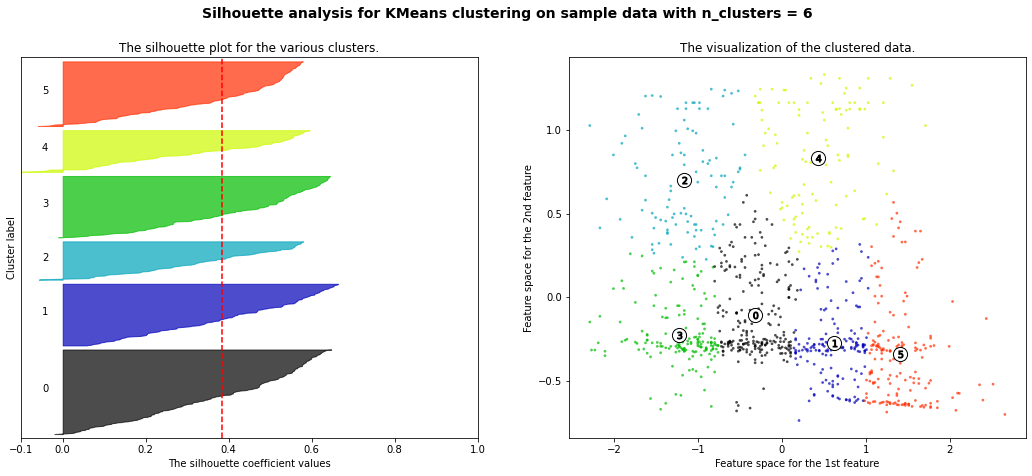

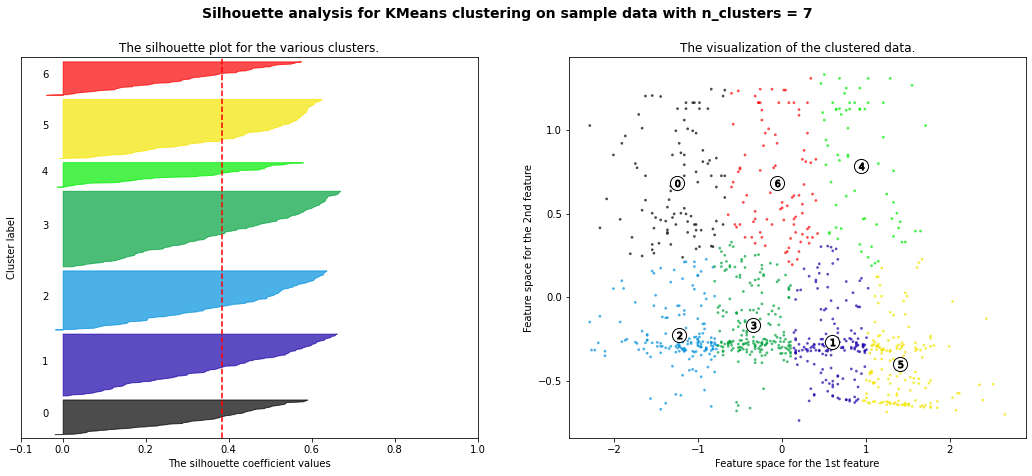

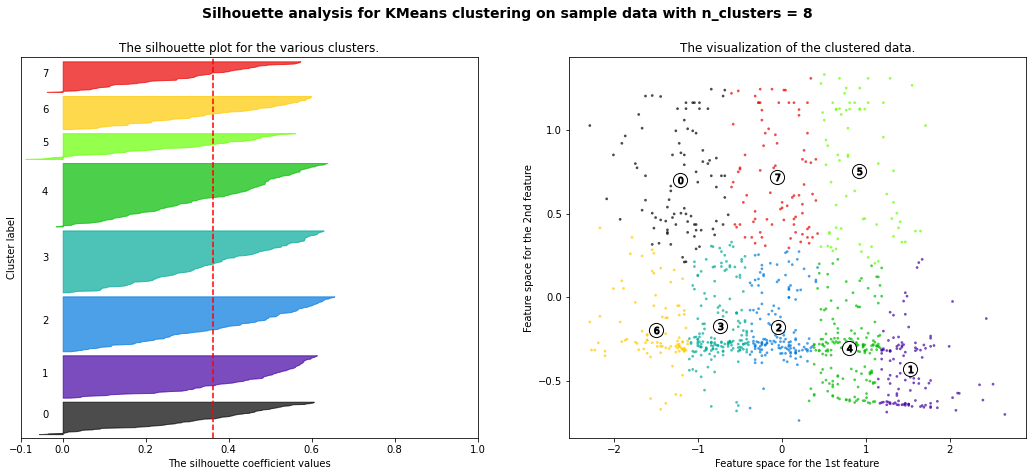

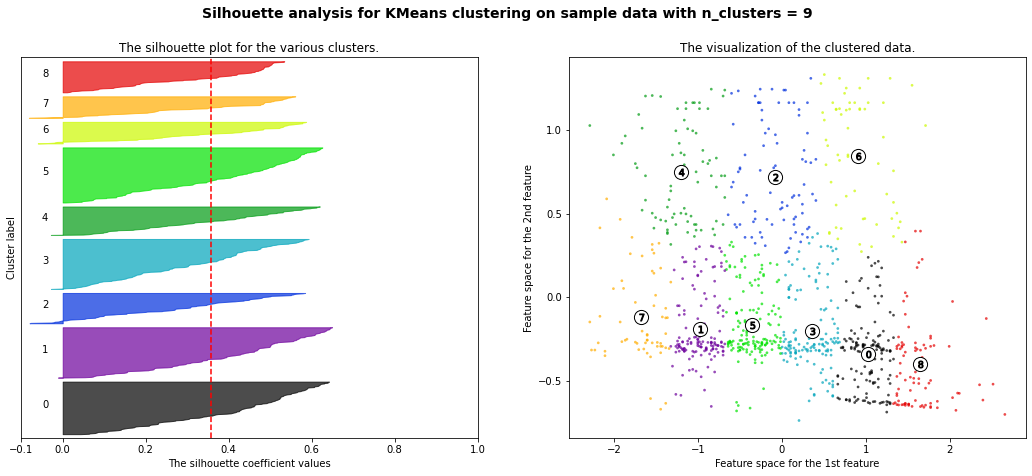

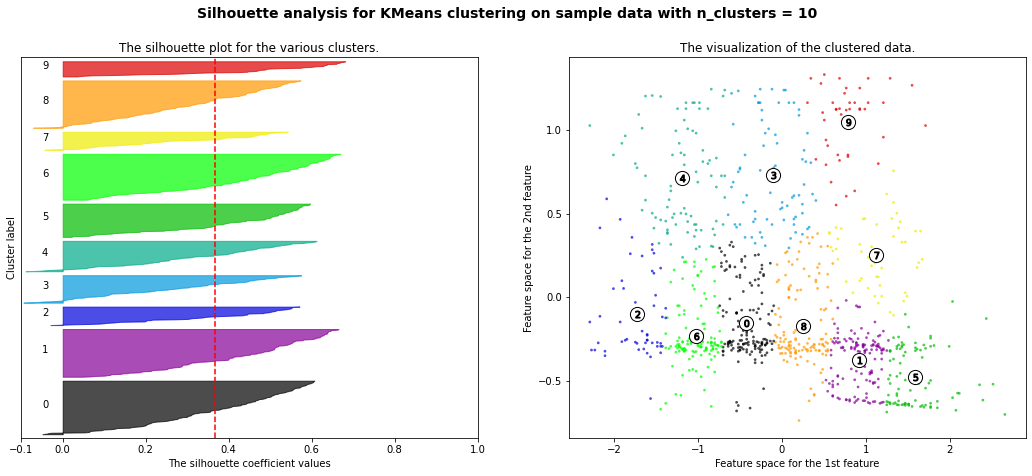

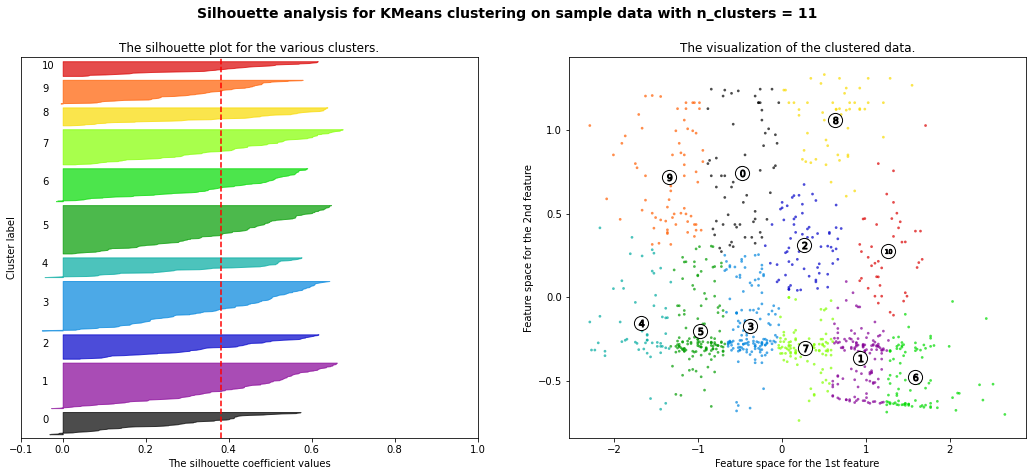

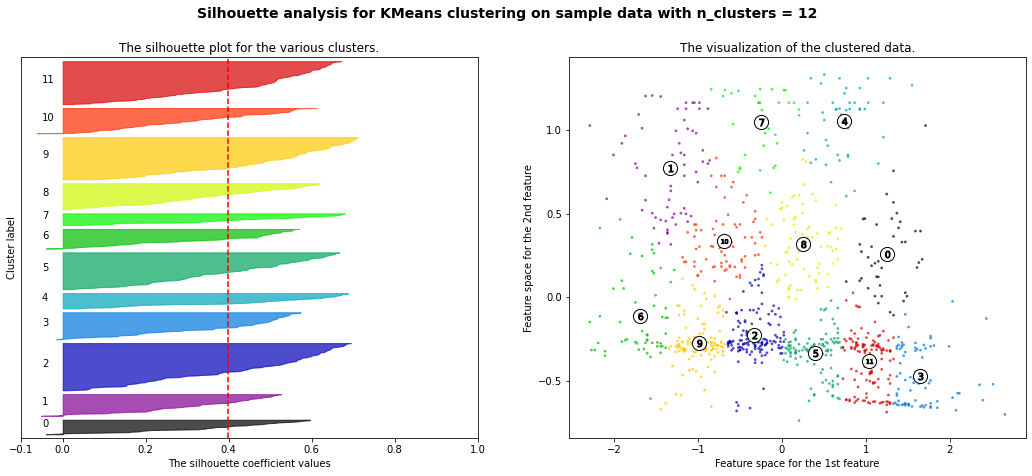

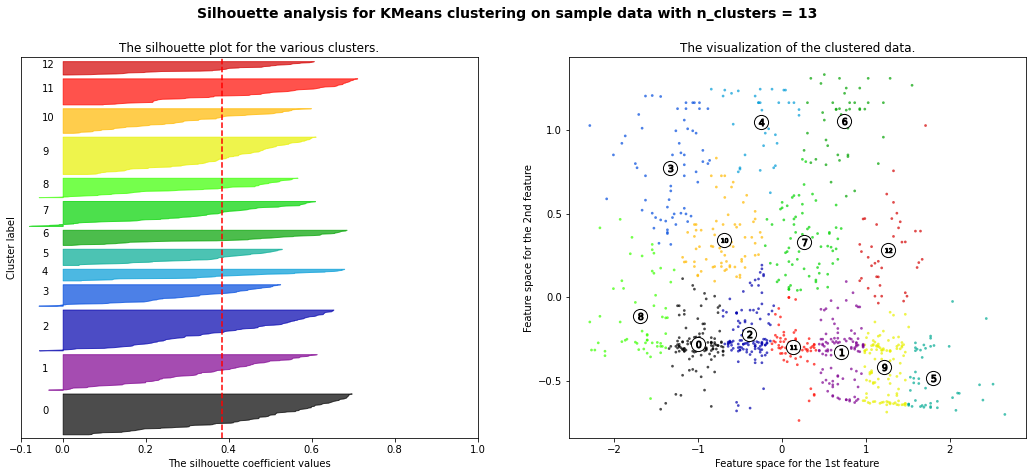

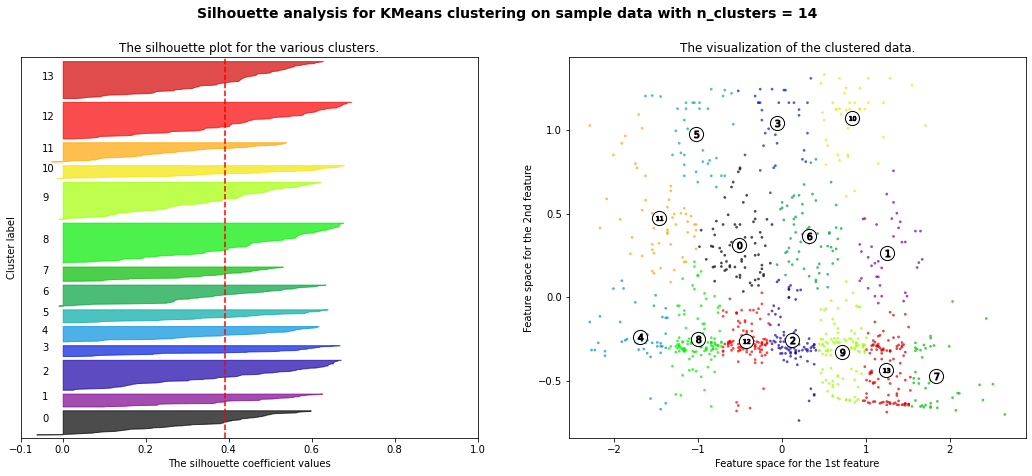

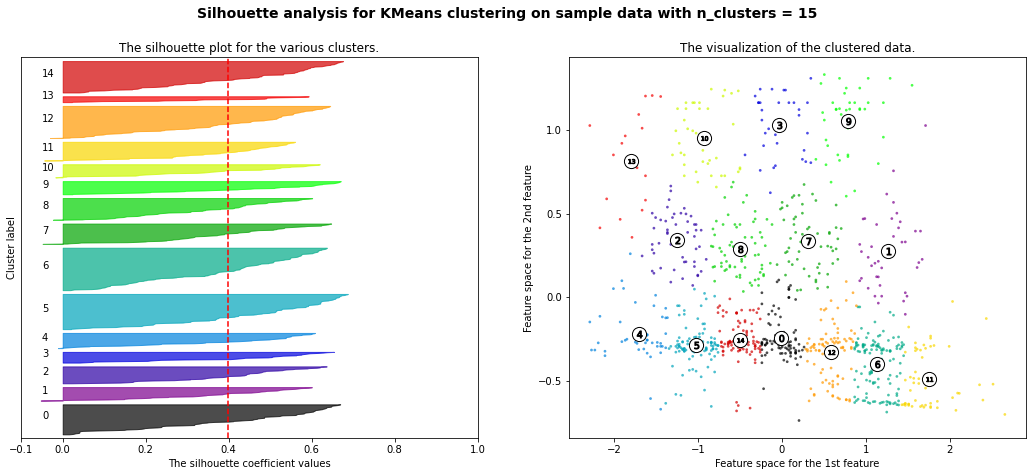

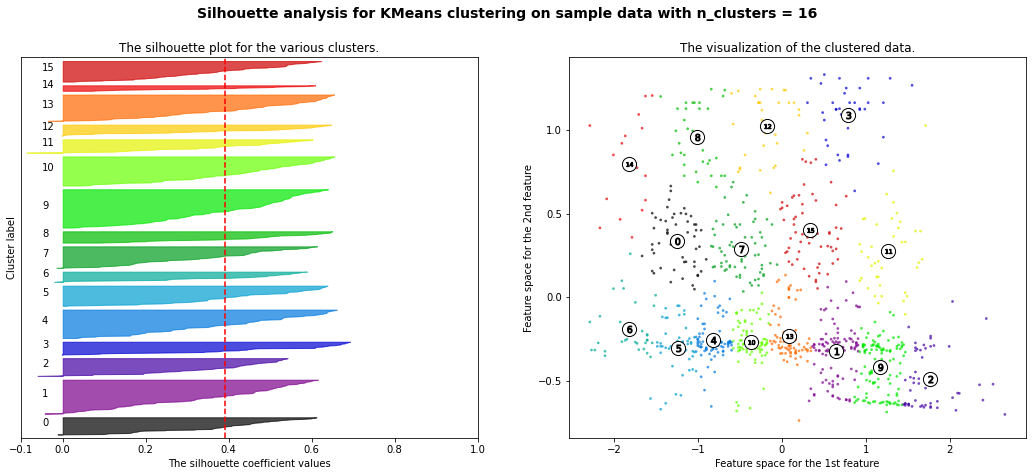

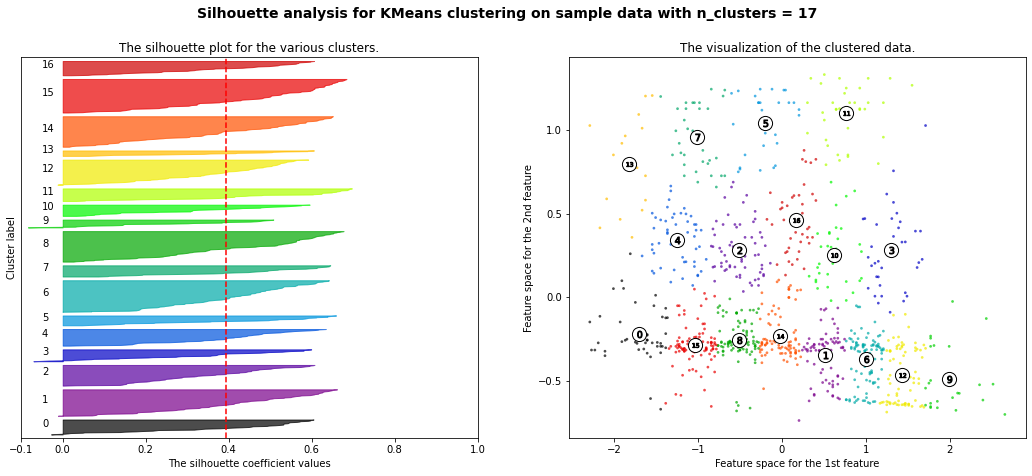

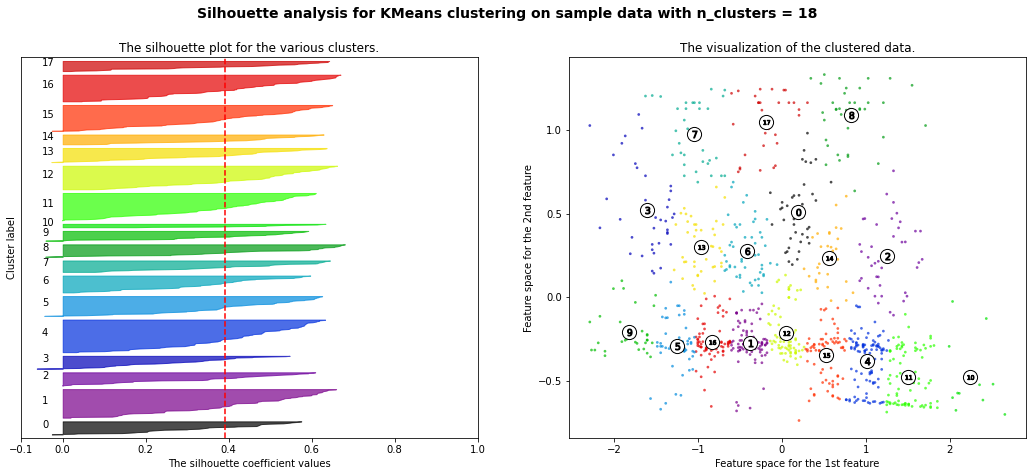

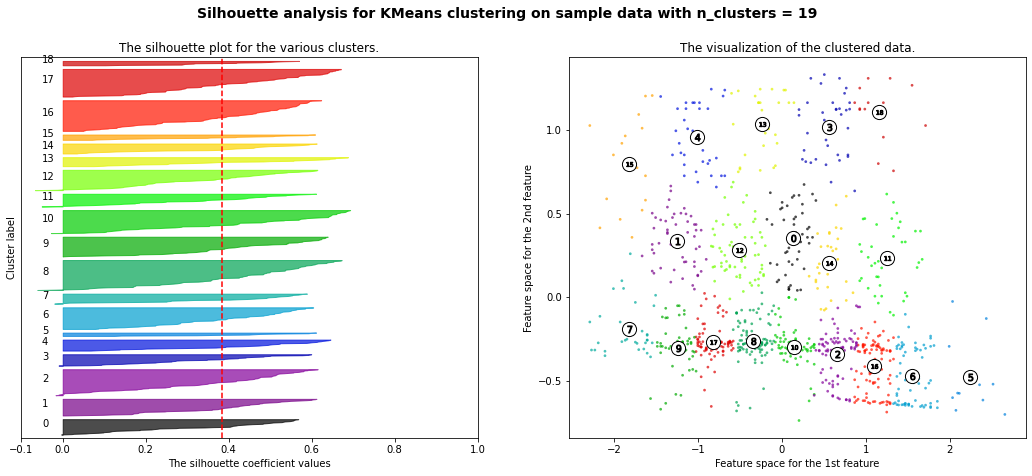

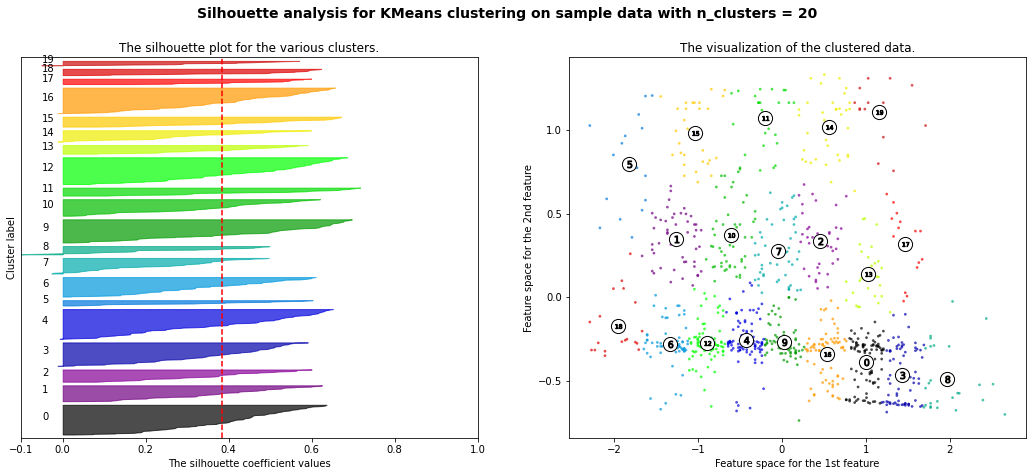

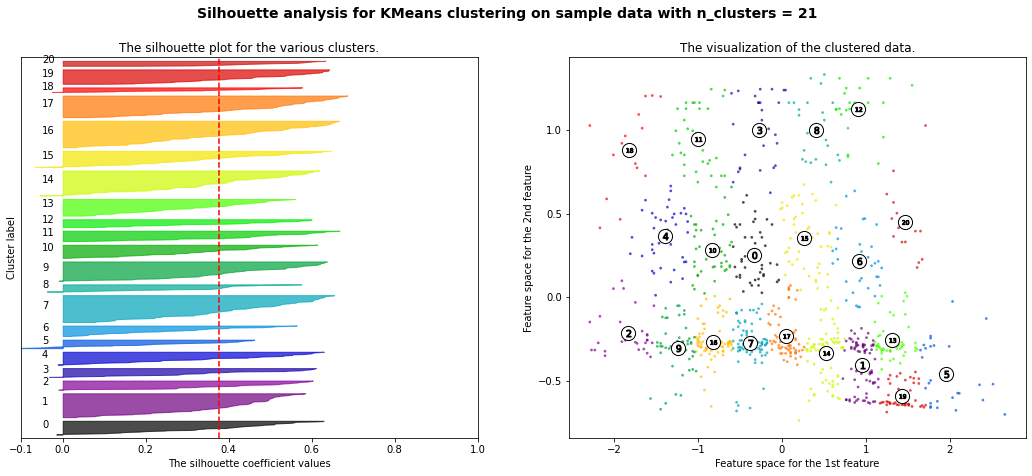

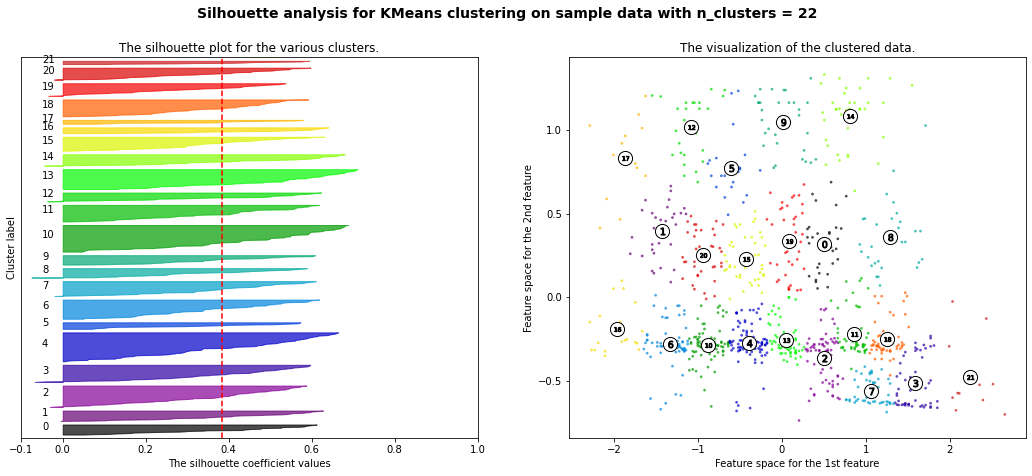

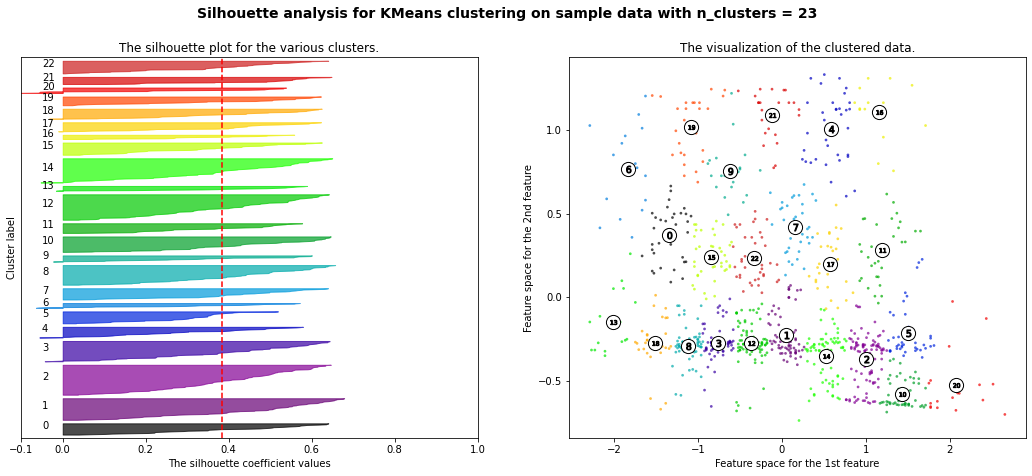

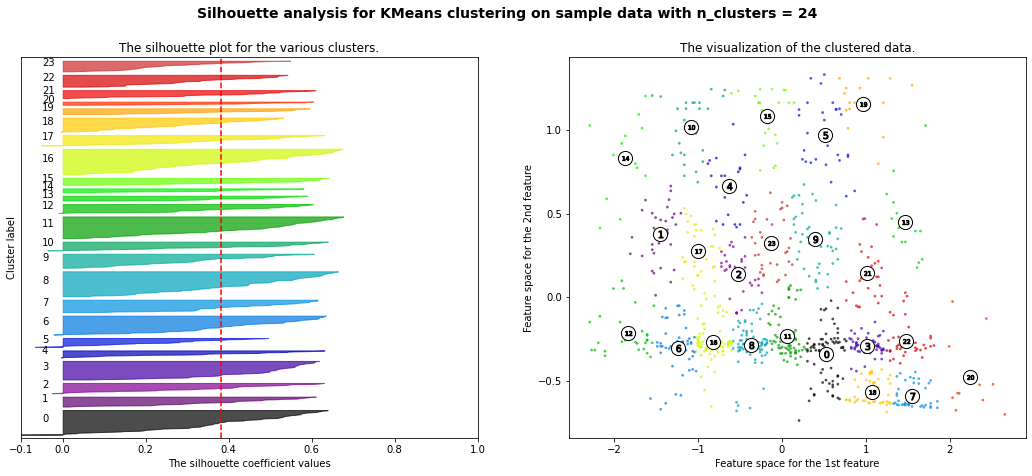

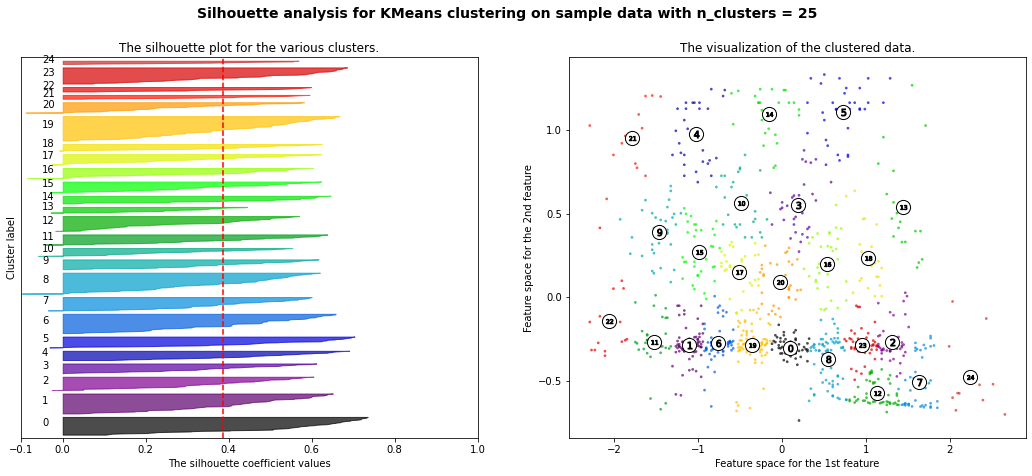

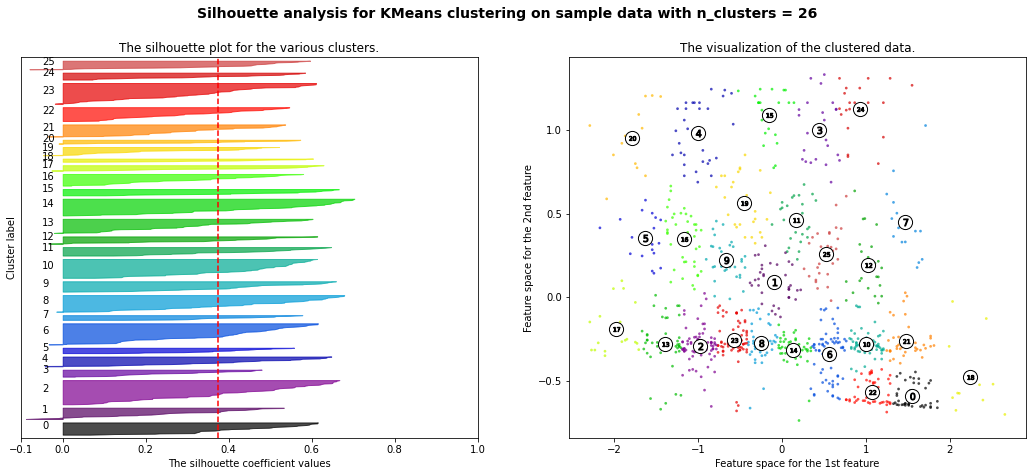

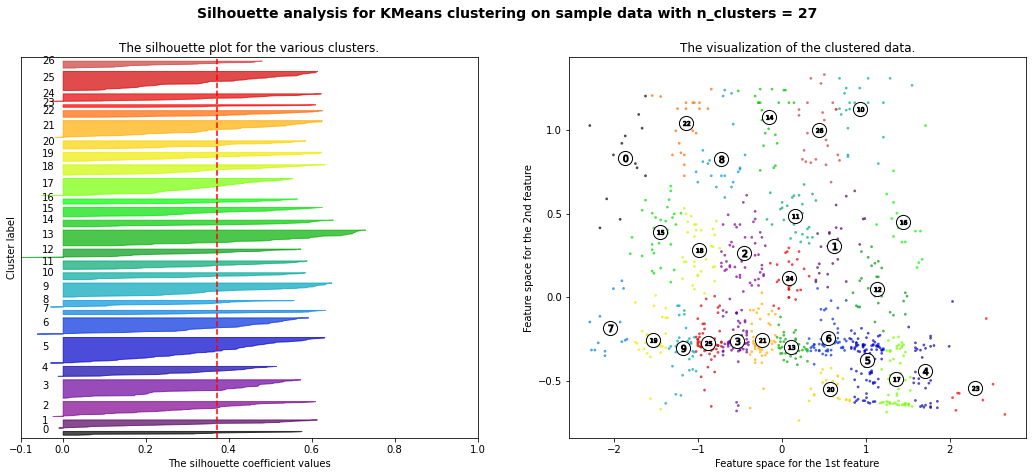

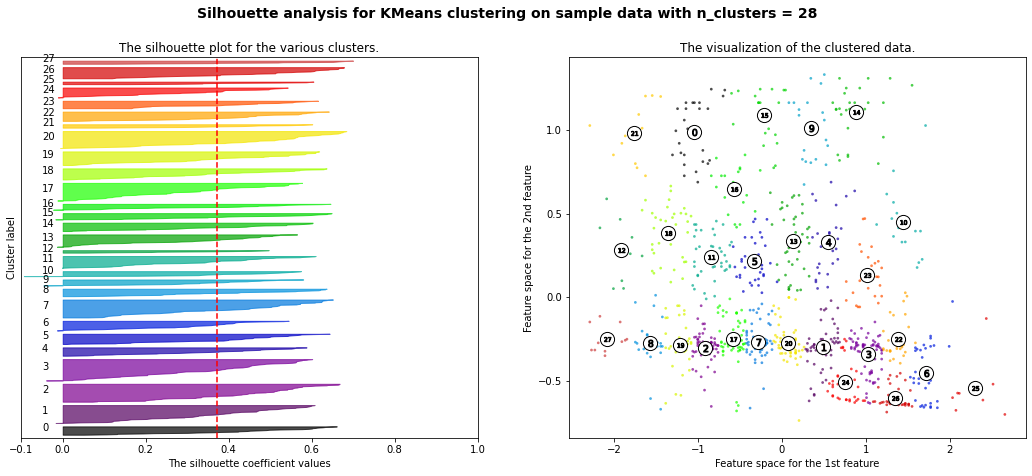

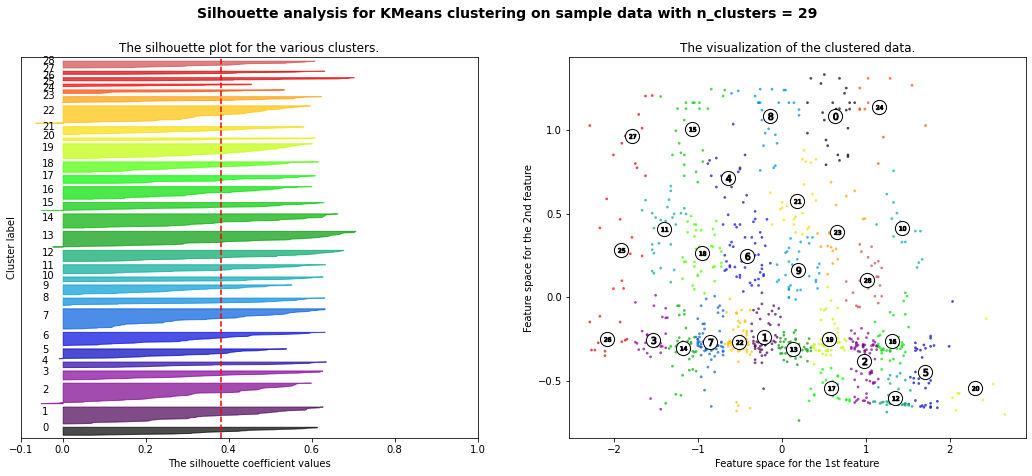

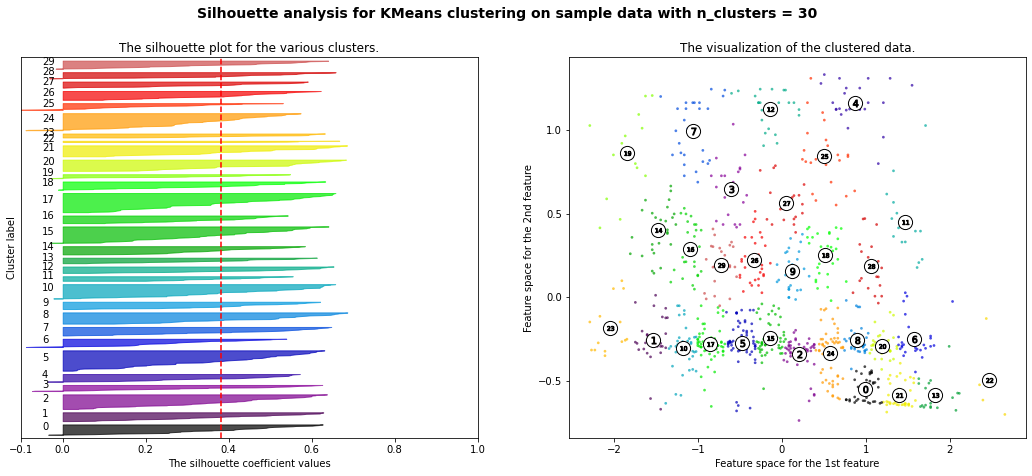

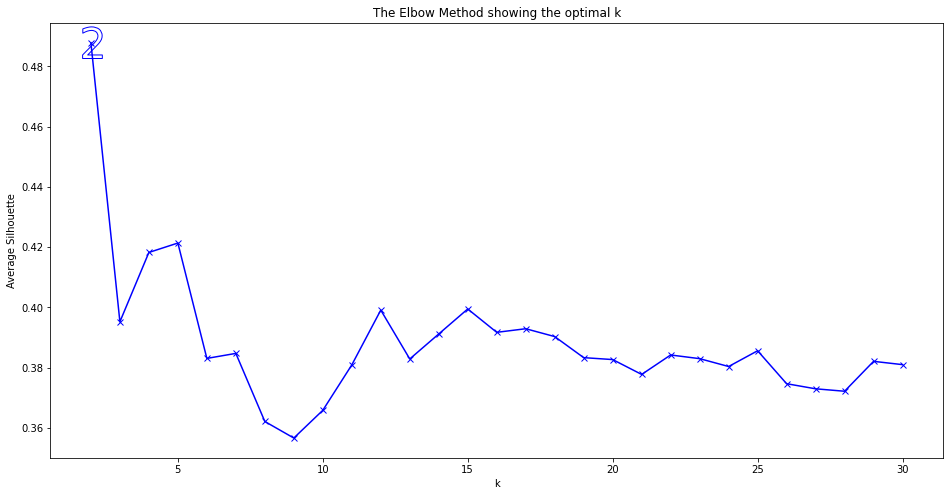

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
min_k = 2
max_k = 30
range_n_clusters = range(min_k,max_k+1)
silhouette_array = []
x_max = min_k
y_max = -1
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(normalized_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(normalized_df)
    cluster_labels = kmeans.fit_predict(normalized_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    if silhouette_avg >= y_max :
      x_max = n_clusters
      y_max = silhouette_avg
    silhouette_array.append(silhouette_avg)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normalized_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(normalized_df[feature[0]], normalized_df[feature[1]], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0],centers[:, 1],marker="o",c="white",alpha=1,s=200,edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, silhouette_array, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal k')
plt.scatter( x_max , y_max ,marker="$%d$" % x_max, s=1000 ,  facecolors='none', edgecolors='blue' ) 

plt.show()

## รัน K-Mean อีกครั้ง กำหนดจำนวน Cluster ตามที่ทำให้ค่าชี้วัดดีที่สุด

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


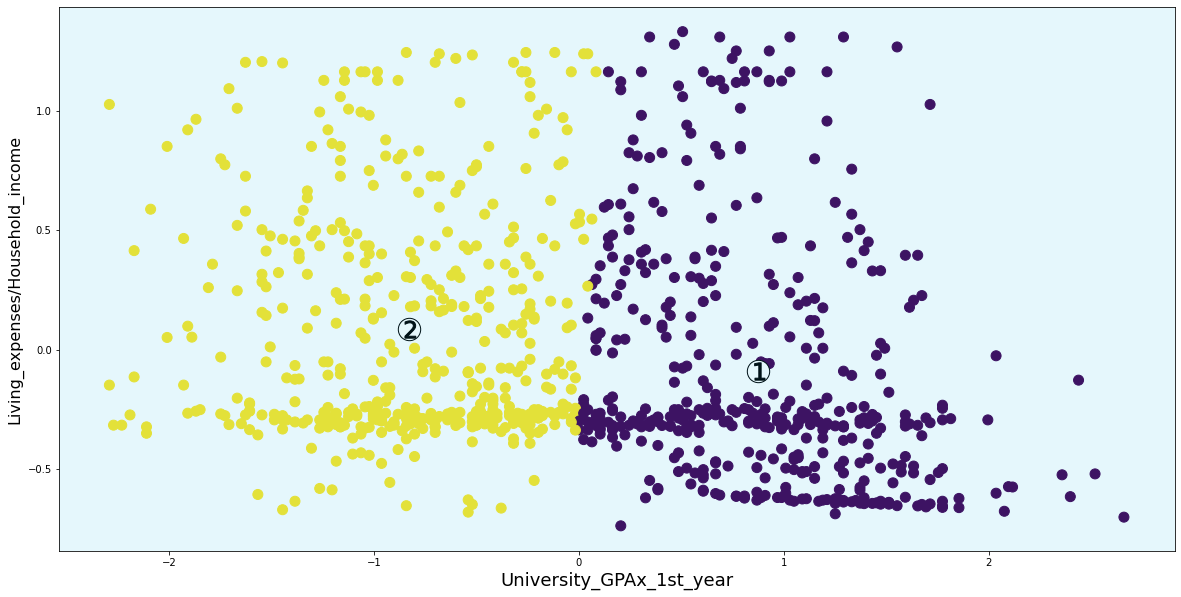

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt, colors
import numpy as np

n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))

plt.scatter(normalized_df[feature[0]], normalized_df[feature[1]], c=cluster_labels, alpha=50,s=100)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[0], fontsize=18)
plt.ylabel(feature[1], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()